In [1]:
%matplotlib inline

from datetime import datetime
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import statsmodels.api as sm

# NBER recessions
from pandas_datareader.data import DataReader

<Axes: title={'center': 'Leading indicator'}>

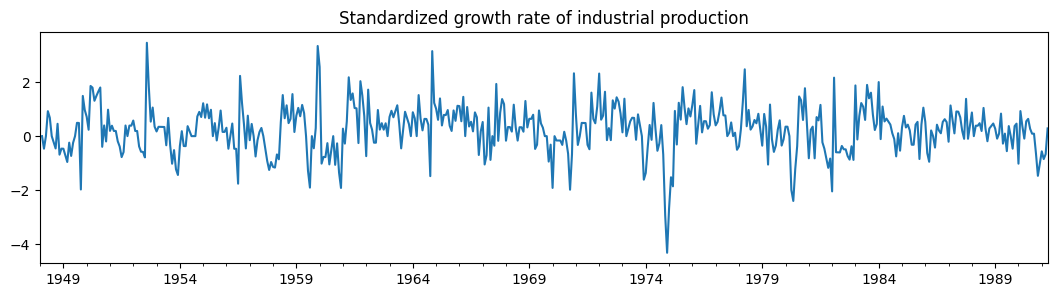

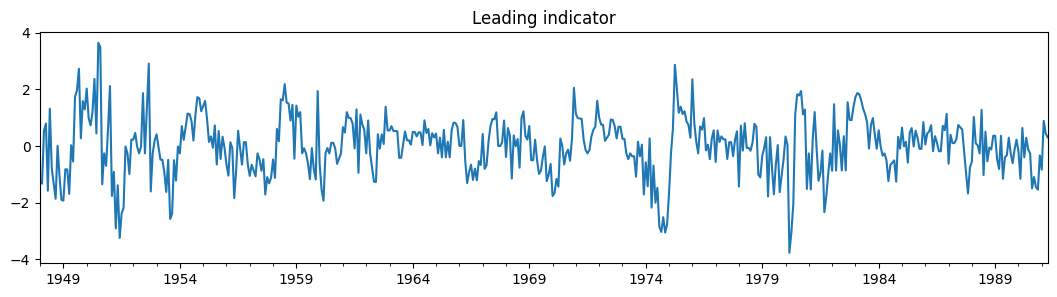

In [2]:
# Get the dataset
filardo = requests.get("http://econ.korea.ac.kr/~cjkim/MARKOV/data/filardo.prn").content
dta_filardo = pd.read_table(
    BytesIO(filardo), sep=" +", header=None, skipfooter=1, engine="python"
)
dta_filardo.columns = ["month", "ip", "leading"]
dta_filardo.index = pd.date_range("1948-01-01", "1991-04-01", freq="MS")

dta_filardo["dlip"] = np.log(dta_filardo["ip"]).diff() * 100
# Deflated pre-1960 observations by ratio of std. devs.
# See hmt_tvp.opt or Filardo (1994) p. 302
std_ratio = (
    dta_filardo["dlip"]["1960-01-01":].std() / dta_filardo["dlip"][:"1959-12-01"].std()
)
dta_filardo["dlip"][:"1959-12-01"] = dta_filardo["dlip"][:"1959-12-01"] * std_ratio

dta_filardo["dlleading"] = np.log(dta_filardo["leading"]).diff() * 100
dta_filardo["dmdlleading"] = dta_filardo["dlleading"] - dta_filardo["dlleading"].mean()

# Plot the data
dta_filardo["dlip"].plot(
    title="Standardized growth rate of industrial production", figsize=(13, 3)
)
plt.figure()
dta_filardo["dmdlleading"].plot(title="Leading indicator", figsize=(13, 3))


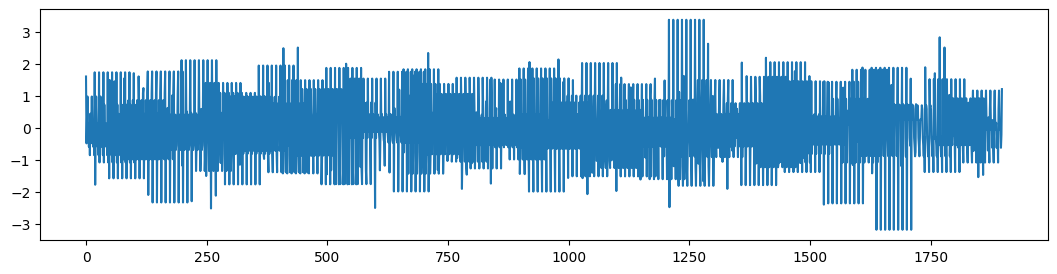

In [3]:
S = np.load('S.npy').flatten()
plt.figure(figsize=(13, 3))
plt.plot(np.diff(((S - S.mean())/S.std())));

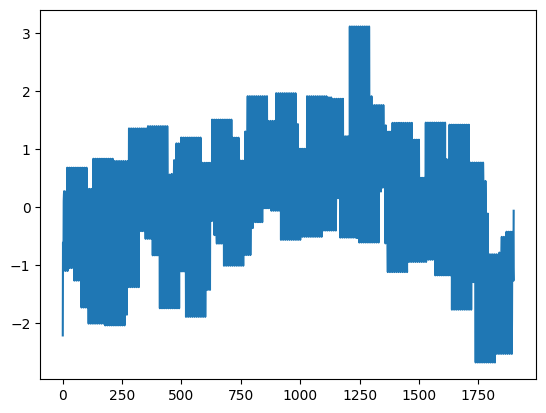

In [4]:
es =(((S - S.mean())/S.std()))
plt.plot(es);

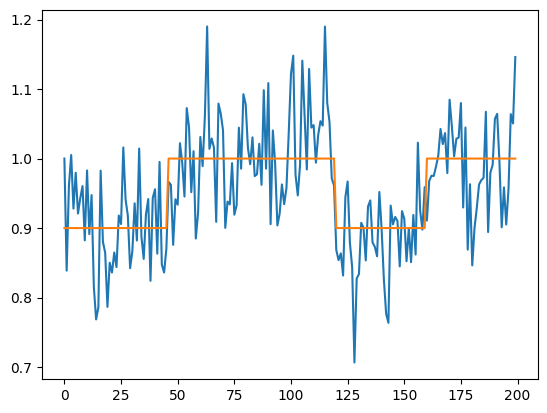

In [96]:
from MR_env_ddpg import MR_env
env = MR_env(S_0 = 1 , kappa = 5, sigma = 0.22, theta = [0.9, 1, 1.1],
             dt = 0.2, T = 40, 
             I_max = 10, lambd = 0.05)


S, _, theta_true = env.Simulate(s0=1, 
                                             i0=0, 
                                             model = 'MC', batch_size=1, ret_reward = False, 
                                             I_p = 0, N = 200)
S = S.squeeze().numpy().flatten()
# %%
plt.plot(S.squeeze())
plt.plot(theta_true.squeeze())

In [15]:
S = np.load('S.npy')
theta_true = np.load('Y.npy')


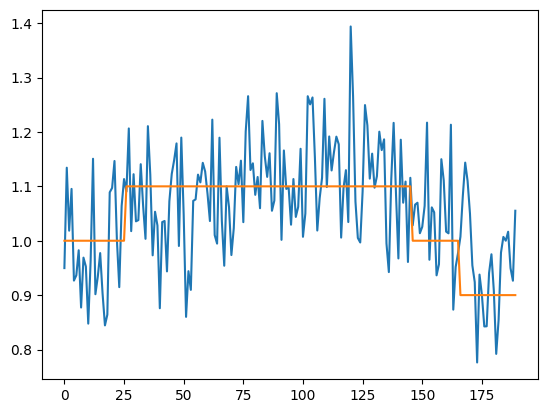

In [16]:
plt.plot(S[:,-1,0])
plt.plot(theta_true);

In [20]:
S = S[:,-1,0]

In [21]:
es =(((S - S.mean())/S.std()))
mod_filardo = sm.tsa.MarkovAutoregression(
    es[1:],
    k_regimes=3,
    order=5,
    switching_ar=False,
    exog_tvtp=sm.add_constant(es[:-1]),
)

np.random.seed(12345)
res_filardo = mod_filardo.fit(search_reps=20)

C:\Users\macri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
res_filardo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                        y   No. Observations:                  184
Model:             MarkovAutoregression   Log Likelihood                -219.301
Date:                  Thu, 23 May 2024   AIC                            480.601
Time:                          19:20:11   BIC                            548.115
Sample:                               0   HQIC                           507.965
                                  - 184                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9660      0.610      1.583      0.113      -0.230       2.162
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1379      0.611     -1.863      0.062      -2.335       0.059
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2279      0.611     -0.373      0.709      -1.425       0.969
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1227      0.019      6.376      0.000       0.085       0.160
ar.L1          0.6665      0.117      5.719      0.000       0.438       0.895
ar.L2         -0.2914      0.129     -2.254      0.024      -0.545      -0.038
ar.L3          0.7371      0.078      9.398      0.000       0.583       0.891
ar.L4         -0.4223      0.115     -3.665      0.000      -0.648      -0.196
ar.L5          0.2653      0.106      2.493      0.013       0.057       0.474
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0     0.5858      0.521      1.123      0.261      -0.436       1.608
p[1->0].tvtp0    -1.5279      0.758     -2.017      0.044      -3.013      -0.043
p[2->0].tvtp0    -0.6423      0.338     -1.901      0.057      -1.305       0.020
p[0->0].tvtp1    -0.5793      0.446     -1.299      0.194      -1.453       0.294
p[1->0].tvtp1     0.0433      0.637      0.068      0.946      -1.205       1.292
p[2->0].tvtp1    -0.4180      0.417     -1.003      0.316      -1.235       0.399
p[0->1].tvtp0    -3.0334      1.542     -1.967      0.049      -6.056      -0.011
p[1->1].tvtp0    -1.4776      0.898     -1.646      0.100      -3.237       0.282
p[2->1].tvtp0    -0.1141      0.311     -0.367      0.714      -0.724       0.495
p[0->1].tvtp1     0.6018      0.924      0.651      0.515      -1.209       2.413
p[1->1].tvtp1    -0.0388      0.686     -0.057      0.955      -1.384       1.306
p[2->1].tvtp1     

In [93]:
x = np.zeros((len(es), 3))
for i in range(len(res_filardo.smoothed_marginal_probabilities[:, 0])):
    if res_filardo.smoothed_marginal_probabilities[i, 0] > (res_filardo.smoothed_marginal_probabilities[i, 1]+res_filardo.smoothed_marginal_probabilities[i, 2]/2):
        x[i, 0] = 0.9
    elif res_filardo.smoothed_marginal_probabilities[i, 1] > (res_filardo.smoothed_marginal_probabilities[i, 0]+res_filardo.smoothed_marginal_probabilities[i, 2]/2):
        x[i, 1] = 1
    else:
        x[i, 2] = 1.1


In [72]:
x

array([[0. , 0. , 1.1],
       [0. , 0. , 1.1],
       [0. , 1. , 0. ],
       ...,
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ]])

In [46]:
40/0.2

200.0

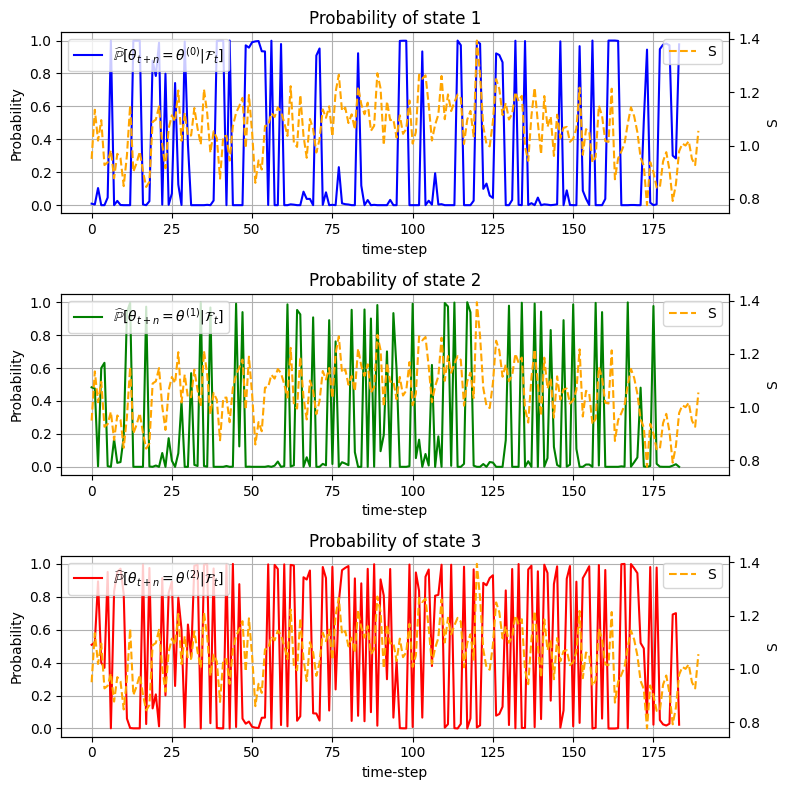

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data
x = len(S.flatten()/0.2)
y1 = np.round(res_filardo.smoothed_marginal_probabilities[:,0], 3)[:200]
y2 = np.round(res_filardo.smoothed_marginal_probabilities[:,1], 3)[:200]
y3 = np.round(res_filardo.smoothed_marginal_probabilities[:,2], 3)[:200]
S = S.flatten()[:200]

# Create a figure with three subplots and twin axes
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot data and twin axes on each subplot
for i, (y, label, color, title) in enumerate(zip([y1, y2, y3], [r"$\widehat{\mathbb{P}}[\theta_{t+n} = \theta^{( 0 )}|\mathcal{F}_t]$", r"$\widehat{\mathbb{P}}[\theta_{t+n} = \theta^{(1)}|\mathcal{F}_t]$", r"$\widehat{\mathbb{P}}[\theta_{t+n} = \theta^{(2)}|\mathcal{F}_t]$"], 
                                                 ['blue', 'green', 'red'], 
                                                 ['Probability of state 1', 'Probability of state 2', 'Probability of state 3'])):
    ax = axs[i]
    ax.plot( y, label=label, color=color)
    ax.set_title(title)
    ax.set_xlabel('time-step')
    ax.set_ylabel('Probability')
    ax.legend(loc='upper left')
    ax.grid(True)
    
    # Create a twin y-axis to plot S
    ax2 = ax.twinx()
    ax2.plot(S, label='S', color='orange', linestyle='--')
    ax2.set_ylabel('S')
    ax2.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


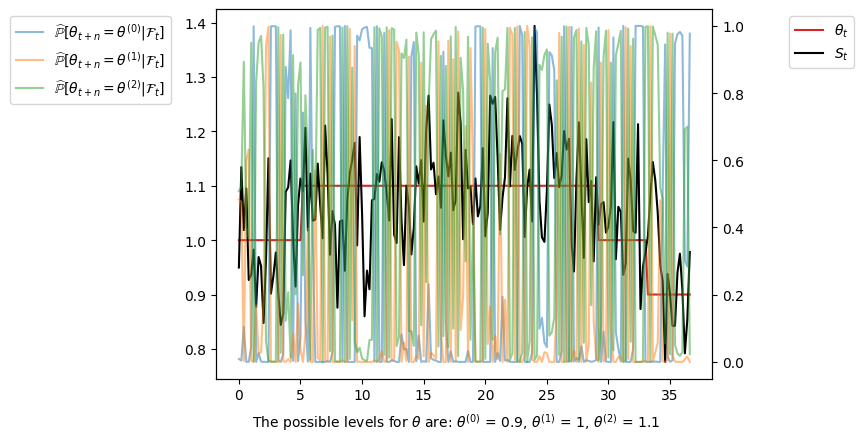

In [26]:
fig  = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
t = np.arange(0, 40, 0.2)

for k in range(3):
    ax2.plot(t[:184], np.round(res_filardo.smoothed_marginal_probabilities[:,k][:184],3), label=r"$\widehat{\mathbb{P}}[\theta_{t+n} = \theta^{(" + str(k) + ")}|\mathcal{F}_t]$", alpha = 0.5)
    
ax.plot(t[:184], theta_true.squeeze()[:184], label=r'$\theta_{t}$', color='tab:red')#+n
ax.plot(t[:184], S.flatten()[:184], label=r'$S_t$', color='k')
plt.xlabel(r"$t$")

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(-0.43, 1))
fig.text(0.5, 0.01, r'The possible levels for $\theta$ are: $\theta^{(0)}$ = 0.9, $\theta^{(1)}$ = 1, $\theta^{(2)}$ = 1.1 ', ha='center')
plt.show()


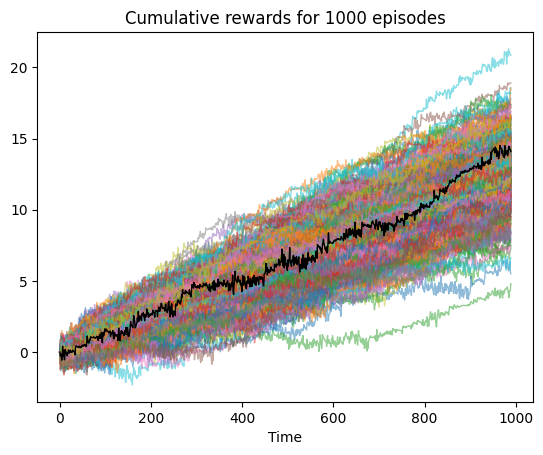

In [37]:
r = np.load('r.npy')
x = np.zeros((r.shape[0], r.shape[1]-12))
num_it = r.shape[0]
t = np.arange(num_it - 12)
for i in range(1, num_it):
    x[i, ... ] = np.cumsum(r[i, :- 12], axis = 0)
    plt.plot(np.cumsum(r[i, :- 12], axis = 0), linewidth=1, alpha=0.5)
plt.plot(np.cumsum(r[0, :- 12], axis = 0), color='k', linewidth=1)
plt.title('Cumulative rewards for 1000 episodes')
plt.xlabel('Time')

plt.show()

In [38]:
x.shape

(500, 990)

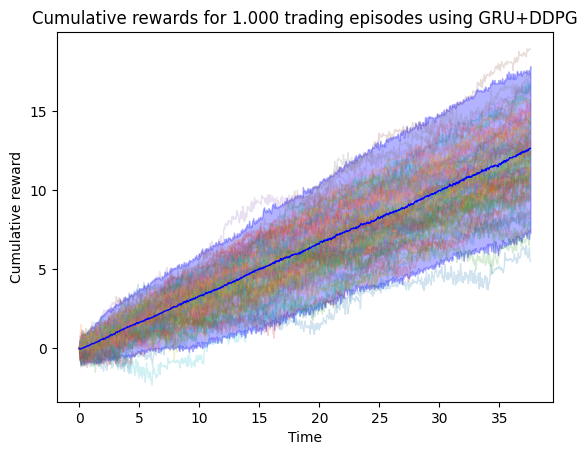

In [83]:
qtl = np.quantile(x, [0.01, 0.5, 0.99], axis = 0)
t = np.arange(x.shape[1])*0.038
for i in range(1, 100):
    plt.plot(t,np.cumsum(r[i, :- 12], axis = 0), linewidth=1, alpha=0.2)
plt.fill_between(t, qtl[0], qtl[2], color='b', alpha=0.3)
plt.plot(t,qtl[1], color='b', linewidth=1)
plt.title('Cumulative rewards for 1.000 trading episodes using GRU+DDPG')
plt.xlabel('Time')
plt.ylabel('Cumulative reward')
plt.show()
#plt.plot(qtl, color='k', linewidth=1)